<a href="https://colab.research.google.com/github/rhiju/rna_lores2/blob/main/0_Simple_1D_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting exponent of a polynomial; very simple 1D fit.
Adapted from
 https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b

In [280]:


import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2)))

def forward(x, e):
    """Forward pass for our fuction"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-7

# Model parameters
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward(x, exp)
y += 10.0* torch.randn(n)

# Optimizer (NEW)
opt = torch.optim.SGD([exp_hat], lr=learning_rate, momentum=0.9)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 2000):
    opt.zero_grad()
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.item())
    exp_history.append(exp_hat.item())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%100 == 0):
      print("Iteration %d" % i)
      print("loss = %s" % loss.item())
      print("exp = %s" % exp_hat.item())


Iteration 0
loss = 3415.465576171875
exp = 3.9962024688720703
Iteration 100
loss = 284.4277648925781
exp = 2.918306589126587
Iteration 200
loss = 135.58291625976562
exp = 2.64265513420105
Iteration 300
loss = 80.78827667236328
exp = 2.475632429122925
Iteration 400
loss = 52.114959716796875
exp = 2.3549914360046387
Iteration 500
loss = 34.69593811035156
exp = 2.261051654815674
Iteration 600
loss = 23.411561965942383
exp = 2.1854686737060547
Iteration 700
loss = 16.193899154663086
exp = 2.1249895095825195
Iteration 800
loss = 12.12636661529541
exp = 2.0795297622680664
Iteration 900
loss = 10.340106964111328
exp = 2.049384832382202
Iteration 1000
loss = 9.72301959991455
exp = 2.0316667556762695
Iteration 1100
loss = 9.530664443969727
exp = 2.0217740535736084
Iteration 1200
loss = 9.471109390258789
exp = 2.016268730163574
Iteration 1300
loss = 9.45233154296875
exp = 2.0131773948669434
Iteration 1400
loss = 9.446304321289062
exp = 2.0114259719848633
Iteration 1500
loss = 9.44434642791748
ex

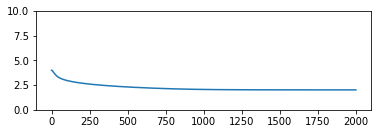

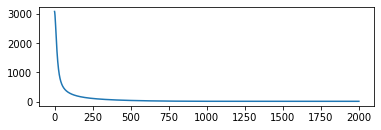

In [69]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(exp_history)
plt.ylim(0, 10)
plt.show()
plt.subplot(2,1,2)
plt.plot(loss_history)

Fit should look good!

tensor([1.9961], requires_grad=True)


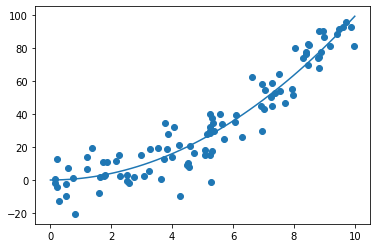

In [197]:

plt.scatter( x, y)
x_fine = Variable(torch.linspace(0,10,50), requires_grad=False)
y_fine = forward( x_fine, exp_hat )
print( exp_hat )
plt.plot(x_fine,y_fine.detach().numpy())
plt.show()


More of a challenge -- can we fit a (jittered) Gaussian?

tensor([2.7366, 6.6128, 1.5496], requires_grad=True)


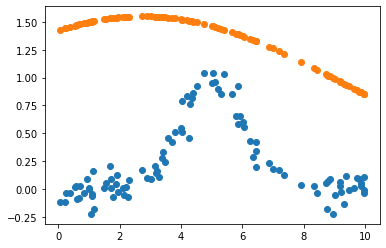

In [293]:
def forward_gaussian(x, params):
    """Forward pass for our fuction"""
    return params[2] * torch.exp( -(1/2)*((x - params[0])/params[1])**2 )

# Let's define some settings
n = 100 # number of examples


# Model definition
p = torch.Tensor( [5,1,1] )
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward_gaussian(x, p)
y += 0.1* torch.randn(n)

plt.scatter(x,y)

# fit?
p_init = Variable(torch.Tensor( 10.0 * torch.rand(3) ), requires_grad=True)
print(p_init)
y_hat = forward_gaussian(x, p_init)
plt.scatter(x,y_hat.detach().numpy())

Iteration 0
loss = 1.1704330444335938
tensor([2.7353, 6.6108, 1.5071], requires_grad=True)
Iteration 1000
loss = 0.32822686433792114
tensor([3.1961, 6.3515, 0.2852], requires_grad=True)
Iteration 2000
loss = 0.3243749737739563
tensor([3.6919, 5.9817, 0.2919], requires_grad=True)
Iteration 3000
loss = 0.3177304267883301
tensor([4.2241, 5.3720, 0.3072], requires_grad=True)
Iteration 4000
loss = 0.2966573238372803
tensor([4.8627, 4.1193, 0.3629], requires_grad=True)
Iteration 5000
loss = 0.08916443586349487
tensor([5.0037, 0.9987, 0.9899], requires_grad=True)
Iteration 6000
loss = 0.08916443586349487
tensor([5.0037, 0.9987, 0.9899], requires_grad=True)
Iteration 7000
loss = 0.08916443586349487
tensor([5.0037, 0.9987, 0.9899], requires_grad=True)
Iteration 8000
loss = 0.08916443586349487
tensor([5.0037, 0.9987, 0.9899], requires_grad=True)
Iteration 9000
loss = 0.08916443586349487
tensor([5.0037, 0.9987, 0.9899], requires_grad=True)


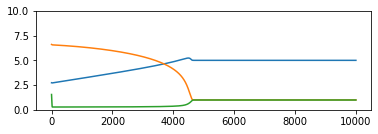

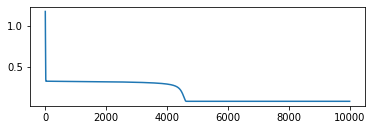

In [294]:
p_hat = Variable(p_init.clone(), requires_grad=True)

# Optimizer (NEW)
learning_rate = 5e-2

opt = torch.optim.SGD([p_hat], lr=learning_rate, momentum=0.5)
#opt = torch.optim.Adagrad([p_hat], lr=learning_rate)

loss_history = []
p_history = []

# Training loop
for i in range(0, 10000):
    opt.zero_grad()
    
    # Compute current estimate
    y_hat = forward_gaussian(x, p_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.item())
    p_history.append(p_hat.detach().numpy().copy())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%1000 == 0):
      print("Iteration %d" % i)
      print("loss = %s" % loss.item())
      print(p_hat)

plt.subplot(2,1,1)
plt.plot(p_history)
plt.ylim(0, 10)
plt.show()
plt.subplot(2,1,2)
plt.plot(loss_history)

Answer: yes -- but have to tweak learning rates and have a good initial guess!

tensor([5.0037, 0.9987, 0.9899], requires_grad=True)


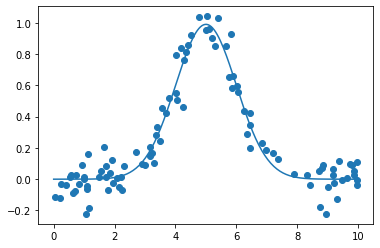

In [301]:
plt.scatter( x, y)
x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
y_fine = forward_gaussian( x_fine, p_hat )
print( p_hat )
plt.plot(x_fine,y_fine.detach().numpy())
plt.show()


In [296]:
for i in range(5):
  print( p_history[i] )
print( len( p_history) )

[2.7366054 6.61283   1.5495723]
[2.7352664 6.610803  1.5071007]
[2.7333097 6.607818  1.443517 ]
[2.7311223 6.6044383 1.369585 ]
[2.7289114 6.6009593 1.2907617]
10000


Following two code blocks give some practice in making a movie in matplotlib

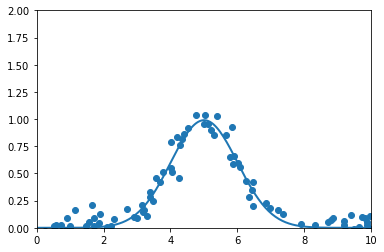

In [300]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
plt.scatter( x, y)
ax.set_xlim(( 0, 10))
ax.set_ylim((0, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
    y_fine = forward_gaussian( x_fine, p_history[20*i] )
    line.set_data(x_fine.numpy(), y_fine.numpy())
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())

How about fitting a deep Relu-based neural network? 

Following based partially on https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

Iteration 0
loss = 0.874142050743103
Iteration 1000
loss = 0.10310424864292145
Iteration 2000
loss = 0.09280409663915634
Iteration 3000
loss = 0.09054260700941086
Iteration 4000
loss = 0.08933717012405396
Iteration 5000
loss = 0.08884584158658981
Iteration 6000
loss = 0.08832991868257523
Iteration 7000
loss = 0.08804711699485779
Iteration 8000
loss = 0.08786337822675705
Iteration 9000
loss = 0.08773814141750336
<generator object Module.parameters at 0x7f85d8501fc0>


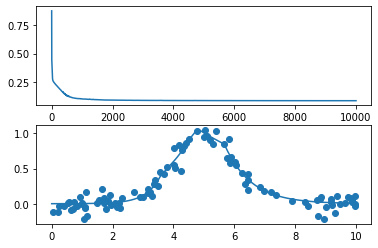

In [309]:
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        x = torch.exp(x)
        return x

#loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

def train_model(x,y,net,opt):
  x_fit = torch.unsqueeze(x,dim=1)
  y_target = torch.unsqueeze(y,dim=1)
  loss_history = []

  # Training loop
  for i in range(10000):
    opt.zero_grad()
    
    # Compute current estimate
    prediction = net(x_fit)
    loss = rmse(prediction, y_target)   
     
    # Do some recordings for plots
    loss_history.append(loss.item())
    #p_history.append(p_hat.detach().numpy().copy())
    
    # Update model parameters
    loss.backward()
    opt.step()
    if (i%1000 == 0):
      print("Iteration %d" % i,)
      print("loss = %s" % loss.item())

  plt.subplot(2,1,1)
  plt.plot(loss_history)

  plt.subplot(2,1,2)
  plt.scatter(x,y.detach().numpy())
  x_fine = Variable(torch.linspace(0,10,200), requires_grad=False)
  x_fine = torch.unsqueeze( x_fine,dim=1) 
  y_fine = net( x_fine )
  plt.plot(x_fine,y_fine.detach())
  print( net.parameters() )


net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network

learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)

train_model(x,y,net,opt)


Iteration 0
loss = 0.7196640968322754
Iteration 1000
loss = 0.0962713435292244
Iteration 2000
loss = 0.08889465779066086
Iteration 3000
loss = 0.08672585338354111
Iteration 4000
loss = 0.08575434237718582
Iteration 5000
loss = 0.08574987202882767
Iteration 6000
loss = 0.08541397750377655
Iteration 7000
loss = 0.08524210751056671
Iteration 8000
loss = 0.08501696586608887
Iteration 9000
loss = 0.08470610529184341
<generator object Module.parameters at 0x7f85d8970150>


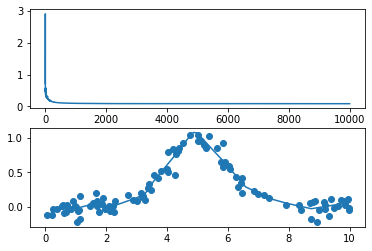

In [310]:
# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(20, 20),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(20, 1),
    )
learning_rate = 5e-2
#opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)
opt = torch.optim.Adagrad(net.parameters(), lr=learning_rate)

train_model(x,y,net,opt)